In [4]:
# Add PATH (adapt!)
push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/Leaf/");
push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/Utils/");
#push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/tools/");

# Use Plots:
using Plots
#using PhotoStructs
plotly()

Plots.PlotlyBackend()

In [5]:
using Revise
using CanopyRTMod
using BenchmarkTools
using Statistics

In [6]:
wl = CanopyRTMod.wl;
wle = CanopyRTMod.wle;
wlf = CanopyRTMod.wlf;

In [7]:
arrayOfLeaves = Array{leafbio{FT}, 1}(undef, CanopyRTMod.canopy.nlayers)
for i = 1:CanopyRTMod.canopy.nlayers
    arrayOfLeaves[i] = leafbio{FT, length(wl), length(wle), length(wlf)}()
    CanopyRTMod.fluspect!(arrayOfLeaves[i], CanopyRTMod.optis)
end

In [8]:
CanopyRTMod.computeCanopyGeomProps!(canopy, angles,canOpt);
CanopyRTMod.computeCanopyMatrices!(arrayOfLeaves,canOpt);
CanopyRTMod.RTM_SW!(canopy, canOpt, canRad,sunRad, CanopyRTMod.soil);
CanopyRTMod.computeSIF_Fluxes!(arrayOfLeaves, canOpt, canRad, canopy, CanopyRTMod.soil);

In [9]:
CanopyRTMod.soil.albedo_SW[:] .=0.1;
@show CanopyRTMod.volscatt(48.0,89,0.1,45)
@show CanopyRTMod.volscatt(48.0,89,360.1,45)
@show CanopyRTMod.volscatt(48.0,89,90,45)
@show CanopyRTMod.volscatt(48.0,89,270,45)
@show cosd(-89)

CanopyRTMod.volscatt(48.0, 89, 0.1, 45) = (0.4831104164618658, 0.4501581650415133, 0.06612821351992318, 0.00514112254974046)
CanopyRTMod.volscatt(48.0, 89, 360.1, 45) = (0.4831104164618658, 0.4501581650415133, 0.06397001667570226, 0.0029829257055195425)
CanopyRTMod.volscatt(48.0, 89, 90, 45) = (0.4831104164618658, 0.4501581650415133, 0.03501511919122603, 0.03315651742621733)
CanopyRTMod.volscatt(48.0, 89, 270, 45) = (0.4831104164618658, 0.4501581650415133, 0.03484742334919013, 0.03298882158418142)
cosd(-89) = 0.01745240643728351


0.01745240643728351

In [14]:
reflVIS = []
reflNIR = []
SIF_FR = []
SIF_R  = []
Pso = []
Po = []
Ps = []
ko = []
CanopyRTMod.angles.tts=48
CanopyRTMod.angles.psi=0
CanopyRTMod.canopy.LAI = 2
for VZA=-85:1.01:85
    CanopyRTMod.angles.tto=VZA
    CanopyRTMod.computeCanopyGeomProps!(canopy, angles,canOpt);
    CanopyRTMod.computeCanopyMatrices!(arrayOfLeaves,canOpt);
    CanopyRTMod.RTM_SW!(canopy, canOpt, canRad,sunRad, CanopyRTMod.soil);
    CanopyRTMod.computeSIF_Fluxes!(arrayOfLeaves, canOpt, canRad, canopy, CanopyRTMod.soil);
    push!(reflVIS, canRad.alb_obs[28])
    push!(reflNIR, canRad.alb_obs[52])
    push!(SIF_R , canRad.SIF_obs[8])
    push!(SIF_FR, canRad.SIF_obs[20])
    push!(Pso, canOpt.Pso[1])
    push!(Ps, canOpt.Ps[1])
    push!(Po, canOpt.Po[1])
    push!(ko, canOpt.ko[1])
end

In [15]:
VZA=-85:1.01:85
plot(VZA, ko, label="ko")

<!DOCTYPE html>
 
 
 Plots.jl

In [16]:
@show wl[28]
@show wl[52]
CanopyRTMod.angles.tts = 48

plot(VZA, Pso, label="Pso")
plot!(VZA, Po, label="Po")
plot!(VZA, Ps, label="Ps")
#@show wlf

wl[28] = 662.0f0
wl[52] = 817.0f0


<!DOCTYPE html>
 
 
 Plots.jl

In [17]:

plot(VZA, reflVIS, label="Red Reflectance")
plot!(VZA, SIF_FR/100, label="Red SIF")

<!DOCTYPE html>
 
 
 Plots.jl

In [18]:

plot(VZA, reflNIR, label="NIR Reflectance")
plot!(VZA, SIF_FR/5, label="Far Red SIF")

<!DOCTYPE html>
 
 
 Plots.jl

In [19]:
CanopyRTMod.soil.albedo_SW[:] .=0.2;
reflRed_SZA = []
reflNIR_SZA = []
CanopyRTMod.canopy.Ω = 1.0
CanopyRTMod.angles.tto=0.2
CanopyRTMod.canopy.LAI=1.
for SZA=0.0:1:75
    CanopyRTMod.angles.tts=SZA
    CanopyRTMod.computeCanopyGeomProps!(canopy, angles,canOpt);
    CanopyRTMod.computeCanopyMatrices!(arrayOfLeaves,canOpt);
    CanopyRTMod.RTM_SW!(canopy, canOpt, canRad,sunRad, CanopyRTMod.soil);
    push!(reflRed_SZA, canRad.alb_direct[28])
    push!(reflNIR_SZA, canRad.alb_direct[52])
end

In [20]:
SZA=0:1:75
plot(SZA, reflNIR_SZA)

<!DOCTYPE html>
 
 
 Plots.jl

In [21]:
SZA=0:1:75
plot(SZA, reflRed_SZA)

<!DOCTYPE html>
 
 
 Plots.jl

In [22]:
# Test plots from Christiaan's papers

In [23]:
reflVIS = Float32[]
reflNIR = Float32[]
SIF_FR = Float32[]
SIF_R  = Float32[]
CanopyRTMod.angles.tts=48
CanopyRTMod.angles.psi=0
CanopyRTMod.canopy.LAI=4.22
for psi=0:359
    CanopyRTMod.angles.psi=psi
    for VZA=0:1:85
        CanopyRTMod.angles.tto=VZA

        CanopyRTMod.computeCanopyGeomProps!(canopy, angles,canOpt);
        CanopyRTMod.computeCanopyMatrices!(arrayOfLeaves,canOpt);
        CanopyRTMod.RTM_SW!(canopy, canOpt, canRad,sunRad, CanopyRTMod.soil);
        CanopyRTMod.computeSIF_Fluxes!(arrayOfLeaves, canOpt, canRad, canopy, CanopyRTMod.soil);
        push!(reflVIS, canRad.alb_obs[28])
        push!(reflNIR, canRad.alb_obs[52])
        push!(SIF_R , canRad.SIF_obs[8])
        push!(SIF_FR, canRad.SIF_obs[20])
    end
end

In [24]:
psi = 350.0
psi2 = abs(psi-FT(360.0)*round(psi/FT(360.0)))
@show CanopyRTMod.volscatt(48.0,89,psi2,85)
@show CanopyRTMod.volscatt(48.0,89,psi,85)


CanopyRTMod.volscatt(48.0, 89, psi2, 85) = (0.47276348919520245, 0.6341013900132804, 0.11570885645438916, 0.00010470239727699943)
CanopyRTMod.volscatt(48.0, 89, psi, 85) = (0.47276348919520245, 0.6341013900132804, 0.011902455121961818, -0.10370169893515034)


(0.47276348919520245, 0.6341013900132804, 0.011902455121961818, -0.10370169893515034)

In [29]:
A = reshape(reflNIR, ( 86,360));
B = reshape(reflVIS, ( 86,360));
SIFFER = reshape(SIF_R, ( 86,360));
SIFFER_FR = reshape(SIF_FR, ( 86,360));

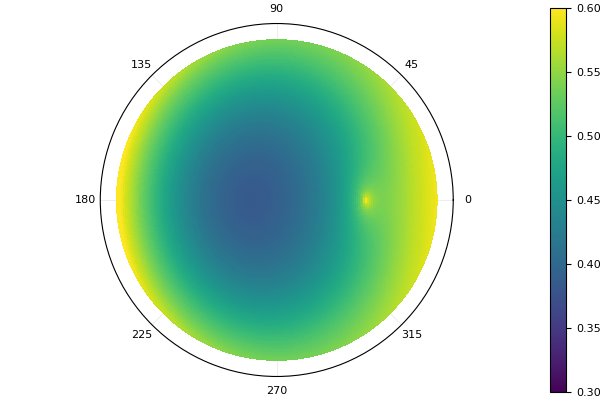

In [26]:
using Plots; pyplot()

#heatmap(A, cmap=)
hm = heatmap(deg2rad.(collect((0:359))),collect(0:1:85),  A,  proj=:polar, color=:viridis,clim=(0.3,0.6))

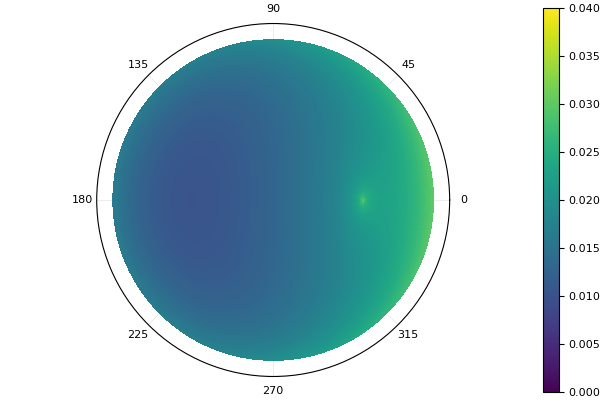

In [33]:
#heatmap(A, cmap=)
hm = heatmap(deg2rad.(collect((0:359))),collect(0:1:85),  B,  proj=:polar, color=:viridis,clim=(0.0,0.04))

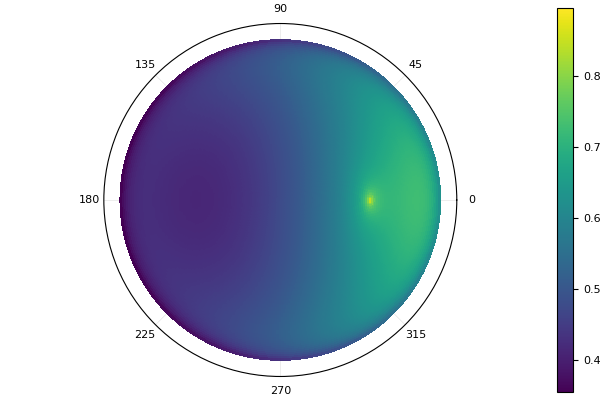

In [27]:
hm = heatmap(deg2rad.(collect((0:359))),collect(0:1:85),  SIFFER, proj=:polar, color=:viridis)

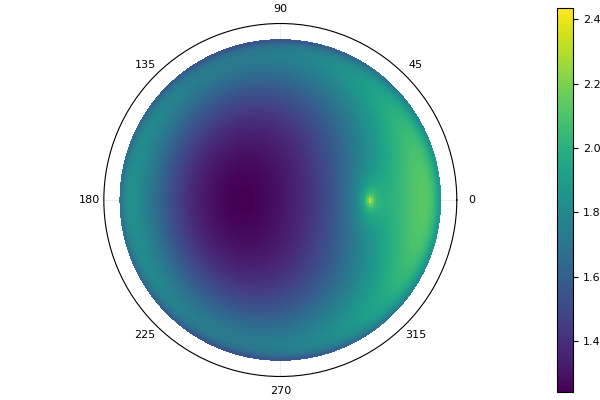

In [28]:
hm = heatmap(deg2rad.(collect((0:359))),collect(0:1:85),  SIFFER_FR, proj=:polar, color=:viridis)

In [20]:
psi

90.0f0

In [202]:

@show CanopyRTMod.volscatt(35.0,70.0,0.,89.)
@show CanopyRTMod.volscatt(35.0,70.0,360.,89.)

CanopyRTMod.volscatt(35.0, 70.0, 0.0, 89.0) = (0.36520793168285853, 0.5981478605598526, 0.08578330686751329, 5.832539063667912e-8)
CanopyRTMod.volscatt(35.0, 70.0, 360.0, 89.0) = (0.36520793168285853, 0.5981478605598526, 0.0034155619880974226, -0.08236768655402524)


(0.36520793168285853, 0.5981478605598526, 0.0034155619880974226, -0.08236768655402524)

In [190]:
using LinearAlgebra
using StaticArrays
θ_l = 30.0;
θ_s = 30.0;
φ_l = 0.0;
θ_o = 40.0;
φ_o = 180.0;

In [191]:
l =  [cosd(θ_l); sind(θ_l)*cosd(φ_l);sind(θ_l)*sind(φ_l)];
n =  [1.0; 0.0; 0.0]
s =  [cosd(θ_s); sind(θ_s); 0]
o =  [cosd(θ_o); sind(θ_o)*cosd(φ_o);sind(θ_o)*sind(φ_o)];

In [196]:
@show cosd(θ_l)*(1 + tand(θ_s)*tand(θ_l)*cosd(φ_l))
@show (s⋅l)/(s⋅n)
@show (o⋅l)/(o⋅n)
@show (cosd(θ_s)*cosd(θ_l) + sind(θ_s)*sind(θ_l)*cosd(φ_l))/cosd(θ_s)

cosd(θ_l) * (1 + tand(θ_s) * tand(θ_l) * cosd(φ_l)) = 1.1547005383792517
(s ⋅ l) / (s ⋅ n) = 1.1547005383792515
(o ⋅ l) / (o ⋅ n) = 0.44647558819579863
(cosd(θ_s) * cosd(θ_l) + sind(θ_s) * sind(θ_l) * cosd(φ_l)) / cosd(θ_s) = 1.1547005383792515


1.1547005383792515

In [33]:
chi_s = []
chi_o = []
frho = []
ftau = []
for VZA=-85:1.01:85
    chi_s_,chi_o_,frho_,ftau_ = CanopyRTMod.volscatt(30.0,VZA,0 ,45)
    push!(chi_s,chi_s_)
    push!(chi_o,chi_o_)
    push!(frho,frho_)
    push!(ftau,ftau_)
end
    

In [35]:
VZA=-85:1.01:85
plot(VZA,(frho), label="Frho")
plot!(VZA,(ftau), label="Ftau")

<!DOCTYPE html>
 
 
 Plots.jl

In [31]:
VZA=-85:1.01:85
plot(VZA,(chi_s), label="chis")
plot!(VZA,(chi_o), label="chio")

<!DOCTYPE html>
 
 
 Plots.jl

In [32]:
plot(chi_s)
plot!(chi_o)

<!DOCTYPE html>
 
 
 Plots.jl

In [102]:
if true || false || false 
    println("dd")
end

dd
